# Methods / Models that were tested / idealized but not continued

## Center estimations - not NN methods
- Simple cases which the gaussians are not overlapping and clearly separable by eye

### [PIPELINE] ppl_lines_square
- Trying to find center with focused 80 search areas using expected estimations for a squared area where the center might be.


#### v0: - Center estimated by the maximum of amplitude

In [ ]:
# In this case:
params = {
'expected_xs' : [14.4, 46.8, 75.6, 104.4, 133.2], # Can estimated from previous data and operating conditions OLD (Size of image was 600 x 200) [20, 65, 105, 145, 185]
'expected_ys' : [35.2 + i * 18.2 for i in range(19)], # Can estimated from previous data and operating conditions OLD: [56 + i * 29 for i in range(19)]
'expected_xdeflection' : 0, # Can estimated from previous data and operating conditions
'expected_ydeflection' : 15, # Can estimated from previous data and operating conditions
'square' : 15,
'threshold' : 1E6, # Can be estimated from the image (maximums)
}

In [ ]:
# Pipeline
ppl_lines_squares(image, params, plot = True, version = 'v0')

#### v1:
- Trying to find center with focused 80 search areas using expected estimations for a squared area where the center might be.
- Center estimated using local max - scipy function
---
- TODO v2: Different implementations:
  - Specify a minimum distance from center in the whole image afterwards
  - Identify if image has two centers (when computing max - use Lagrangian) - If it has it needs to correct the square
  - Laplacian applied to the extraction so if the gaussian was declining and started increasing, crops this point inwards (meaning where the current Gaussians is mixing with other Gaussian?)
  - Use a transformation for the image (for example, laplacian or gradient)

In [ ]:
# In this case:
params = {
'expected_xs' : [14.4, 46.8, 75.6, 104.4, 133.2], # Can estimated from previous data and operating conditions
'expected_ys' : [35.2 + i * 18.2 for i in range(19)], # Can estimated from previous data and operating conditions
'expected_xdeflection' : 0, # Can estimated from previous data and operating conditions
'expected_ydeflection' : 15, # Can estimated from previous data and operating conditions
'square' : 15,
'threshold' : 1E6, # Can be estimated from the image (maximums),
'centers_min_d': 2, # Minimum distance from centers
}

In [ ]:
# Pipeline
ppl_lines_squares(image, params, plot = True, fig_size = (5, 4),
                  version = 'v1', return_one = True)

In [ ]:
# Fit Gaussians using mixture model - Not so good - Found scikit-image libary and jumped the developments to there.
x_centers, y_centers = ppl_lines_squares(image, params, plot = False,
                  version = 'v1', return_one = True)
means_init = np.array((x_centers, y_centers)).T
means_init = means_init[~np.isnan(means_init).any(axis=1)]
ppl_fit_gaussians(image, means_init = means_init, fig_size = (5, 4),
                  center_coordinates = None, plot = True)

### [PIPELINE] ppl_2D_xy_profile_v0 - Found scikit-image libary and jumped the developments to there.
- Center estimation using a previous compressed space in x and y directions
  - Estimate params of the A(x) and A(y) using Gaussian mixtures, Kmeans and svitzky-golay used

  **Variations**: - Where to cross the line to extracted A(x) and A(y);
  - Signal transformation log / squared / other types of treatment

In [ ]:
# Find local extrema
x_max = argrelextrema(z.sum(axis = 0), np.greater)
plt.plot(z.sum(axis = 0))
plt.scatter(x_max[0], np.repeat(3.5E8, len(x_max[0])))

In [ ]:
# Find local extrema
y_max = argrelextrema(z.sum(axis = 1), np.greater)
plt.plot(z.sum(axis = 1))
plt.scatter(y_max[0], np.repeat(2.5E8, len(x_max[0])))

In [ ]:
plt.plot(z.sum(axis = 1))

In [ ]:
# Different treatment:
  # Sum up lines / columns - 1D concentration of the values
  # Apply K means clustering to find the center in the 1D concentration

  # This can be done using the second derivative ones

  # Find the x center - Sum up the columns and use the k means with 5 nucleus to find the centers
  # Count the number of gaussian in each row using the second derivatives
  # Using this info and the 1D path use K means again to find the n_number of nucleus

  # It might be possible to estimate the dispersion with the 1D profiles as well

  # This can be an adjustment to find gaussians with too much deflection

In [ ]:
# Treatment with the same idea :
  # Maybe it will be necessary to identify directly from the lines drawn - Kmeans
  # can cluster the nucleous in a line path, but it may suffer from the different number of gaussians
  # De-trend the x path and then find the maximums

### Pipeline ppl_hdbscan - Found scikit-image libary and jumped the developments to there.
- Try hdbscan to clusterize the Gaussians
- https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html

In [ ]:
# Different treatment:
  # Filter the Amplitudes greater than a threshold (Or use the derivatives magnitude as as mask for the filtering)
    # Challenge of Gaussians not too high
  # x, y should be the gaussians
  # Hdbscan in the x and ys to find the gaussians clusteres

In [ ]:
# Different treatment:
  # Check the gradient 0 in dz_dx and dz_dy (Check the images below)
  # Second derivative might be the answer
  # Hessian - how to identify a maximum / minimum

In [ ]:
# Different treatment:
  # Grid (32 lines or so) . Generate features using savitzky-Golay
  # MLP -> Predicts the Gaussians

In [ ]:
# Problem with no center:
  # Ensemble method of Savitzky-Golay - Compute the centers with this other format

# [ESTIMATION] Pipeline ppl_SCIKIT
- Processing using Scikit-image library

## Peaks in the gradients

In [ ]:
# Dimensions
dx = 0.143 / 143
dy = 0.377 / 377

# Compute gradients
(dz_dx, dz_dy, dz_dx_dx,
dz_dx_dy, dz_dy_dx, dz_dy_dy) = gradient_transform(dx, dy, image[2])

# Find local maxima coordinates
coordinates = peak_local_max(dz_dy_dy, min_distance = 1)

# 2D plot in grayscale - selected image for initial development
fig, ax = plt.subplots()
plot_grayscale(x, y, image[2], ax)
plt.scatter(image[0][0, [coordinates[:, 1]]], image[1][coordinates[:, 0], 0], s = 5)

# [ESTIMATION] Pipeline ppl_Yolo

## Random predict

In [ ]:
# Untrained model predict
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/2023/Tesi/Data/Images/test_image_person.jpg')
results = model.predict(img)
img = cv2.resize(img, (640, 480))

for result in results:
  boxes = result.boxes.cpu().numpy() # get boxes on cpu in numpy
  for box in boxes: # iterate boxes
    r = box.xyxy[0].astype(int) # get corner points as int
    print(r) # print boxes
    cv2.rectangle(img, r[:2], r[2:], (0,255,0), 2) # draw boxes on img
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

for result in results:
    for mask in result.masks:
        m = torch.squeeze(mask.data)
        composite = torch.stack((m, m, m), 2)
        tmp = img * composite.cpu().numpy().astype(np.uint8)
        cv2_imshow(tmp)
        cv2.waitKey(0)

## Predict - model from Ultralytics HUB

In [ ]:
import requests
import json

In [ ]:
# Run inference on an image
url = "https://api.ultralytics.com/v1/predict/V32b698SsXVTTFB6984d"
headers = {"x-api-key": "6162cfe0bd4ab25872d87d710fcc6a20f97b8218e2"}
data = {"size": 640, "confidence": 0.25, "iou": 0.45}

In [ ]:
n_image = 109
labels_type = "Labelsv0_detect"
image_path = f"/content/gdrive/MyDrive/Colab Notebooks/2023/Tesi/Data/Images/gaussian_{n_image}.png"
label_path = f"/content/gdrive/MyDrive/Colab Notebooks/2023/Tesi/Data/{labels_type}/gaussian_{n_image}.txt"

with open(image_path, "rb") as f:
  response = requests.post(url, headers=headers, data=data, files={"image": f})

# Check for successful response
response.raise_for_status()

Number of indentifiable Gaussians (center in the image): 78


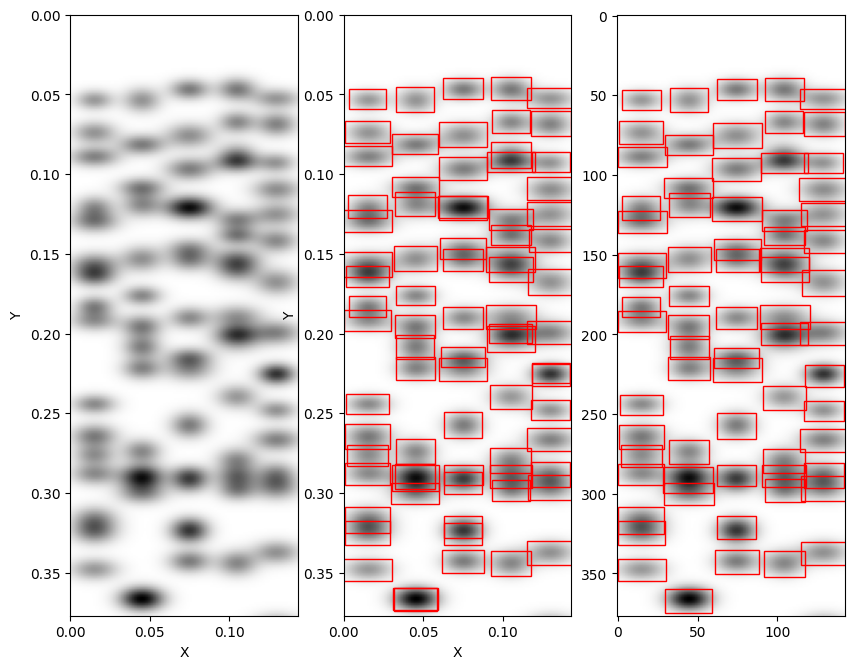

In [ ]:
# Response
json_data = json.loads(json.dumps(response.json()))

# Open the image file
im = Image.open(image_path)

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize = (10, 10))

# Display the image
axs[2].imshow(im)

# Iterate over each detected object and draw rectangle around it
for obj in json_data["data"]:
    x1 = obj["box"]["x1"]
    y1 = obj["box"]["y1"]
    x2 = obj["box"]["x2"]
    y2 = obj["box"]["y2"]

    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    axs[2].add_patch(rect)

x, y, z = gaussians_labelled(image_path,
                   label_path,
                   axs[1],
                   task = task,
                   colorbar = False)

plot_grayscale(x, y, z, colorbar = False, ax = axs[0])

axs[0].invert_yaxis()
axs[1].invert_yaxis()

# Many experiments

# Transforms experiments

## Extracting the main directions of Gaussians and its magnitudes

In [ ]:
# TODO: Take the center and expand (using the steepest gradient direction)

In [ ]:
# Dimensions
dx = 200 / 143
dy = 600 / 377

In [ ]:
# Compute gradients
dz_dx, dz_dy, dz_dx_dx, dz_dx_dy, dz_dy_dx, dz_dy_dy = gradient_transform(dx, dy, z)

In [ ]:
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
plot_grayscale(x, y, z, ax = axs[0, 0])
plot_grayscale(x, y, dz_dx, ax = axs[0, 1])
plot_grayscale(x, y, dz_dy, ax = axs[0, 2])
plot_grayscale(x, y, dz_dx_dx, ax = axs[0, 3])
plot_grayscale(x, y, dz_dx_dy, ax = axs[1, 0])
plot_grayscale(x, y, dz_dy_dx, ax = axs[1, 1])
plot_grayscale(x, y, dz_dy_dy, ax = axs[1, 2])
axs[1, 3].set_axis_off()

In [ ]:
# How is the values in dz_dx_dx path for the center gaussian?

In [ ]:
# Gradient computation
dz_dx, dz_dy, gradient_magnitude, gradient_direction = compute_gradient(dx, dy, mat['F_data'][:,:, 4])

In [ ]:
plt.figure(figsize = (20, 10))
plot_grayscale(x, y, dz_dx)
plt.show()

In [ ]:
# Second derivative gradient
dz_dx_dx, dz_dx_dy, gradient_magnitude, gradient_direction = compute_gradient(dx, dy, dz_dx)

In [ ]:
# Second derivative - This clearly might be potential to center identification
plt.figure(figsize = (20, 10))
plot_grayscale(x, y, dz_dx_dx)
plt.show()

## Gradient descendent path

In [ ]:
def steepest_descent(dz_dx, dz_dy):
    # Steepest descent is opposite to the gradient, so we negate the components
    steepest_descent_dx = -dz_dx
    steepest_descent_dy = -dz_dy

    # Compute the magnitude and direction of the steepest descent
    descent_magnitude = np.sqrt(steepest_descent_dx**2 + steepest_descent_dy**2)
    descent_direction = np.arctan2(steepest_descent_dy, steepest_descent_dx)

    return steepest_descent_dx, steepest_descent_dy, descent_magnitude, descent_direction

In [ ]:
def perpendicular_vector(dz_dx, dz_dy, descent_dx, descent_dy):
    # Compute the cross product to get a vector perpendicular to the gradient
    cross_product = np.cross(np.array([dz_dx, dz_dy, 0]), np.array([descent_dx, descent_dy, 0]))

    # The magnitude and direction of the perpendicular vector
    perp_magnitude = np.linalg.norm(cross_product)
    perp_direction = np.arctan2(cross_product[1], cross_product[0])

    return cross_product, perp_magnitude, perp_direction

In [ ]:
def gradient_descent_perpendicular(x, y, z, depth=1):
    dz_dx, dz_dy, grad_mag, grad_dir = compute_gradient(x, y, z, depth=depth)
    descent_dx, descent_dy, descent_mag, descent_dir = steepest_descent(dz_dx, dz_dy)
    perp_vec, perp_mag, perp_dir = perpendicular_vector(dz_dx, dz_dy, descent_dx, descent_dy)

    return {'gradient': {'magnitude': grad_mag, 'direction': grad_dir},
            'descent': {'magnitude': descent_mag, 'direction': descent_dir},
            'perpendicular': {'vector': perp_vec, 'magnitude': perp_mag, 'direction': perp_dir}}

## Savitzky-Golay
- The idea is to find the inflection points in a path in the image to try to find the boundaries between Gaussians

In [ ]:
def apply_savgol_filter(line_z, window_length=5, polyorder=3):
    """
    Fitting smoothed polynomial and computing the first and second derivative of it
    params:
      ::window length (needs to be odd) - typical values ranges from 5 to 21.
      ::polynomial order - typical values ranges from 2 to 6.
    """
    # Apply savgol filter
    smoothed = savgol_filter(line_z, window_length, polyorder)

    # Calculate first derivative
    first_derivative = np.gradient(smoothed)

    # Calculate second derivative
    second_derivative = np.gradient(first_derivative)

    return smoothed, first_derivative, second_derivative

In [ ]:
# Assuming line_z is your 1D data array.
smoothed, first_derivative, second_derivative = apply_savgol_filter(line_z, window_length=7, polyorder=3)
plot_data(line_z, smoothed, first_derivative, second_derivative, fig_size = (15, 15))

In [ ]:
# Select points which laplacian is zero (find the middle points)
# K means - find the points related to one gaussian
# With points of one group -> x_min, x_max and y_min and y_max (Boxed)

# Dispersion:
  # PCA to find the 2 PCs of dispersion
  # Neural network using the box - somehow deduce geometries

In [ ]:
# Smoothing with savitzy-golay make possible to identify second derivative zeroing - center
# From second derivatives possible to identify coordinates to perform the boxing

In [ ]:
# Yolo - boxing

## Laplacian

In [ ]:
# Laplacian filter
laplace_z = laplace(mat['F_data'][:,:, 4])

In [ ]:
# 2D contour plot
plt.figure()
contours = plt.contour(x, y, laplace_z, levels=5)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.show()

In [ ]:
# 2D plot in grayscale
plt.imshow(laplace_z, origin='lower', cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(label='Z value')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Understand laplacian with path
line_x, line_y, line_z = interpolate_line((20, 0), (20, 600), 1000, x, y, laplace_z)
plot_path(x, y, laplace_z, line_x, line_y, line_z)

In [ ]:
# Understand laplacian with path
line_x, line_y, line_z = interpolate_line((20, 0), (20, 600), 1000, x, y, mat['F_data'][:,:, 4])
plot_path(x, y, mat['F_data'][:,:, 4], line_x, line_y, line_z)

# Generation exploration

## Distribution generation

In [ ]:
# 2D plot in grayscale - selected image for initial development
fig, ax = plt.subplots()
plot_grayscale(x, y, mat['F_data'][:,:, 4], ax)
image = [x, y, mat['F_data'][:,:, 4]]

In [ ]:
# Parameters extraction
amplitude, xs, ys, dispersion_x, dispersion_y = parameters_extract(mat['Fit_flux'], 4)

In [ ]:
# Organize the tuples
params = list(zip(xs, ys, dispersion_x/np.sqrt(2), dispersion_y/np.sqrt(2),
                  amplitude, len(amplitude) * [0]))

In [ ]:
# Generate gaussians
x, y, z = generate_distribution((0, 0.143), (0, 0.377), 143, 377, params)

In [ ]:
fig, ax = plt.subplots()
plot_grayscale(x, y, z, ax = ax)

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

In [ ]:
# 2D contour plot
plt.figure()
contours = plt.contour(x, y, z, levels=10)
plt.clabel(contours, inline=True, fontsize=8)
plt.show()

In [ ]:
# 2D plot in grayscale
plt.imshow(z, origin='lower', cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(label='Z value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distributions')
plt.show()

## Path line distribution

In [ ]:
# Line path - z value
x, y, z = generate_distribution((-10, 10), (-10, 10), 0.1, params)
line_x, line_y, line_z = interpolate_line((-10, -10), (10, 10), 1000, x, y, z)

plot_path(x, y, z, line_x, line_y, line_z)

In [ ]:
# Comparing with true Z
x, y, z = generate_distribution((-10, 10), (-10, 10), 0.1, params)
line_x, line_y, line_z = interpolate_line((-10, -10), (10, 10), 1000, x, y, z)
_, _, z_true = calculate_true_z((-10, -10), (10, 10), 1000, params)

compare_z_values(x, y, z, line_x, line_y, line_z, z_true)

# Laplacian filter

## Noise scenario

In [ ]:
# Z with noise
z_noise = add_noise(z, 0.1)

In [ ]:
# 2D plot in grayscale
plt.imshow(z_noise, origin='lower', cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))

plt.colorbar(label='Z value')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distributions')
plt.show()

## Without noise

In [ ]:
# Laplacian filter
laplace_z = laplace(z)

In [ ]:
# 2D contour plot
plt.figure()
contours = plt.contour(x, y, laplace_z, levels=5)
plt.clabel(contours, inline=True, fontsize=8)
plt.show()

## With noise

In [ ]:
# Laplacian filter
laplace_z_noise = laplace(z_noise)

In [ ]:
# 2D plot in grayscale
plt.imshow(laplace_z_noise, origin='lower', cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(label='Z value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distributions')
plt.show()

In [ ]:
# 2D contour plot
plt.figure()
contours = plt.contour(x, y, laplace_z_noise, levels=5)
plt.clabel(contours, inline=True, fontsize=8)
plt.show()

## Denoised data using Gaussian kernel
- Gaussian filter performs a kind of weighted average around each point. The weights are determined by the Gaussian function, meaning that points further from the center have less influence on the result.

In [ ]:
# Smoothing with Gaussian filter
z_smooth = gaussian_filter(z_noise, sigma = 3)

In [ ]:
# 2D plot in grayscale
plt.imshow(z_smooth, origin='lower', cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(label='Z value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distributions')
plt.show()

In [ ]:
# Laplacian filter
laplace_z_smoothed = laplace(z_smooth)

In [ ]:
# 2D contour plot
plt.figure()
contours = plt.contour(x, y, laplace_z_smoothed, levels=5)
plt.clabel(contours, inline=True, fontsize=8)
plt.show()